# Task-Customer Segmentation Using Machine Learning

# 1.Importing Required Libaries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# 2 .Importing Dataset

In [2]:
Data=pd.read_csv("Mall_Customers.csv")

# 3.Display Top 5 Rows of The Dataset

In [3]:
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 4.Check Last 5 Rows of The Dataset 

In [4]:
Data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 5 .Find Shape of Our Dataset(Number of Rows And Number of Columns)

In [5]:
Data.shape

(200, 5)

# 6.Get Information About Our DataSet

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 7 .Get Statistics About The Dataset

In [7]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 8.Check Null Values In The Dataset 

In [8]:
Data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 9.Check Duplicate Values In The DataSet

In [9]:
  Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

# 10.KMeans Clustering

In [10]:
X=Data[['Annual Income (k$)','Spending Score (1-100)']]

In [11]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [12]:
from sklearn.cluster import KMeans

In [13]:
k_means = KMeans()
k_means.fit(X)

KMeans()

In [14]:
k_means = KMeans()
k_means.fit_predict(X)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 6, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 5, 1, 5, 2, 5, 2, 5,
       1, 5, 2, 5, 2, 5, 2, 5, 2, 5, 1, 5, 2, 5, 1, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0])

# 11 .Elbow Method To Find Optimal Number of Clusters

In [15]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [16]:
wcss

[269981.28,
 183499.07470288628,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 37442.247450375704,
 35349.63923628174,
 31119.51360585835,
 23971.669696969704,
 21350.299708043898]

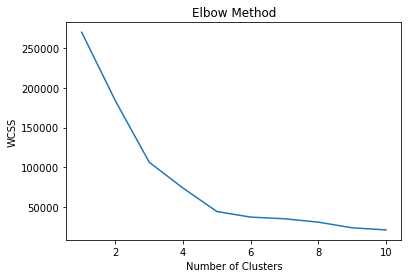

In [17]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# 12 .Model Training

In [18]:
X=Data[['Annual Income (k$)','Spending Score (1-100)']]

In [19]:
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(X)

In [20]:
 y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

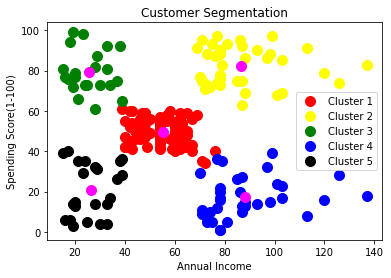

In [21]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

In [22]:
k_means.predict([[15,39]])

array([4])

# 13 .Save The Model

In [23]:
import joblib

In [24]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [25]:
model = joblib.load("customer_segmentation")

In [26]:
model.predict([[15,39]])

array([4])

# 14 .GUI

In [27]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load("customer_segmentation")
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium Spending Score")
    elif result[0] == 1:
        Label(master, text="Customers with high annual income and high Spending Score")
    elif result[0] == 2:
        Label(master, text="Customers with low annual income and high Spending Score")
    elif result[0] == 3:
        Label(master, text="Customers with high annual income and low Spending Score")
    elif result[0] == 4:
        Label(master, text="Customers with low annual income and low Spending Score")


master =Tk()
master.title("Customer Segmentation Using Machine Learning")

label = Label(master, text ="Customer Segmentation Using Machine Learning "
            ,bg="black",fg="white"). \
               grid(row=0,columnspan=2)


Label(master,text="Annual Income").grid(row=1)
Label(master,text="Spending Score").grid(row=2)

e1=Entry(master)
e2=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='Predict',command=show_entry_fields).grid()

mainloop()

This Customer belongs to cluster no:  4
This Customer belongs to cluster no:  4
This Customer belongs to cluster no:  4
This Customer belongs to cluster no:  0
